<a href="https://colab.research.google.com/github/fbeilstein/presentations/blob/master/svm_problem_for_July_5_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

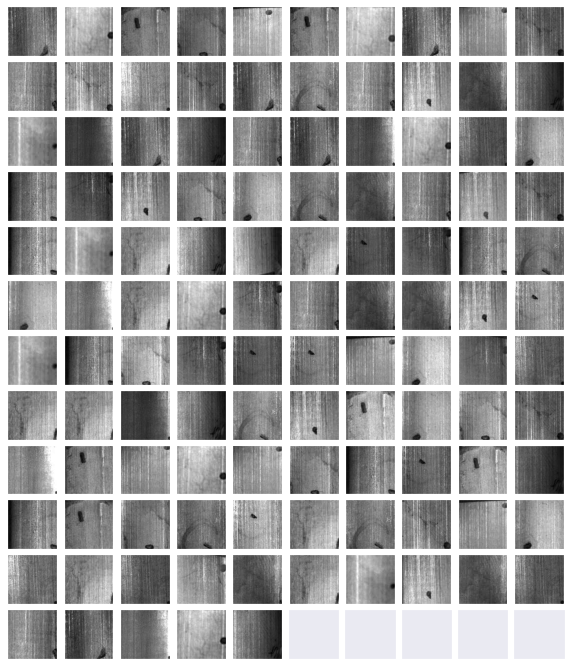

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

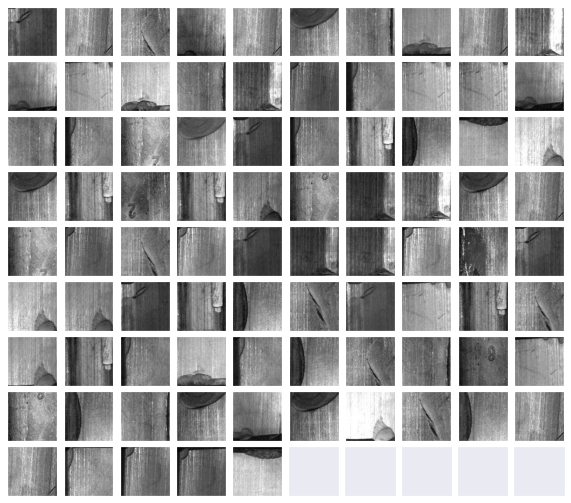

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

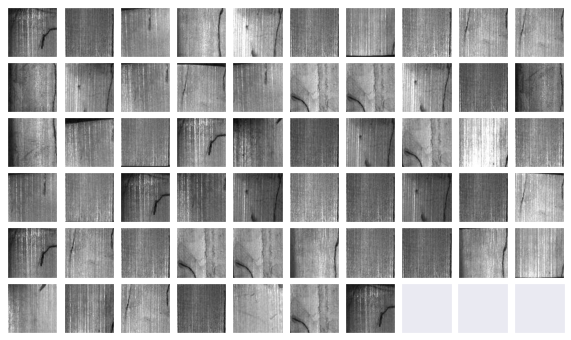

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

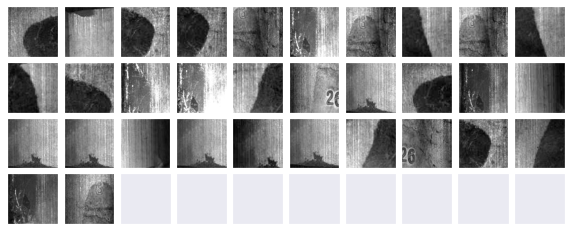

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

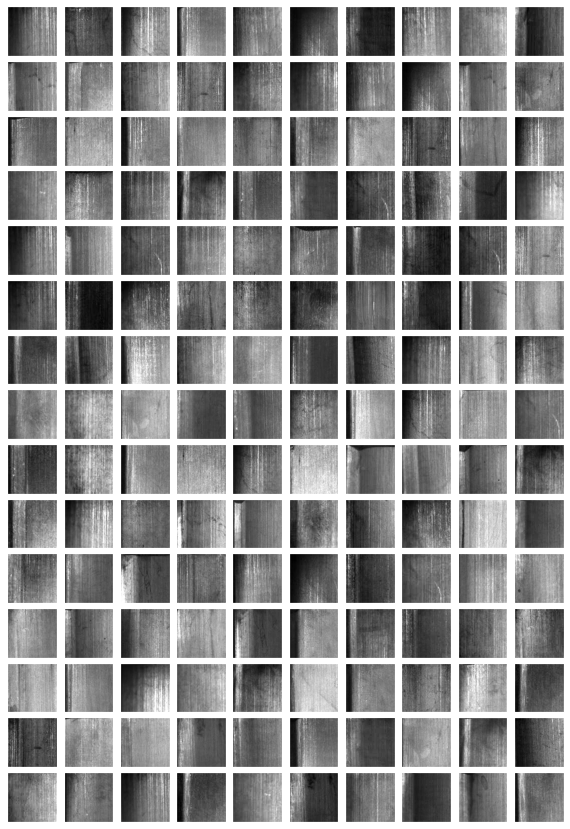

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

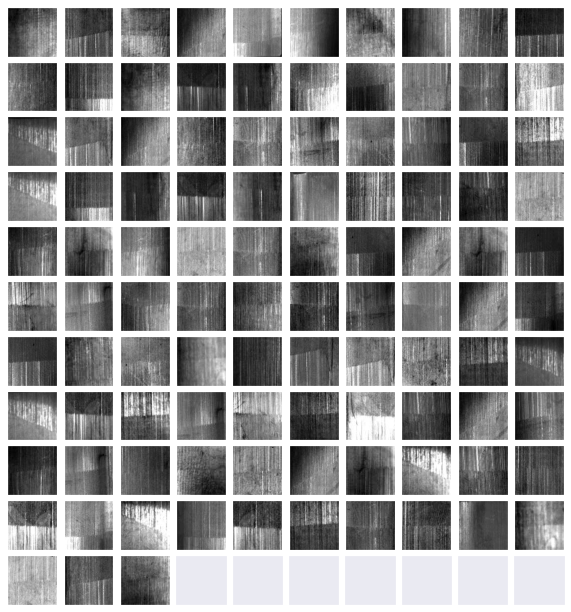

<IPython.core.display.Javascript object>

In [86]:
#@title #Download and import dataset
#@markdown Run this block of code to download the dataset (images) for classification.
#@markdown This is a simplified version of the https://www.kaggle.com/alex000kim/magnetic-tile-surface-defects dataset from Kaggle.
#@markdown You may want to check the description of the original dataset for more information.
#@markdown Make sure no error occurs, otherwise ask for help.
#@markdown
#@markdown After execution is complete, the dataset is ready to use.
#@markdown You will get few variables defined, names listed below
#@markdown 
#@markdown |variable|meaning|
#@markdown ---|---
#@markdown `im_blowhole` | the blowhole defect
#@markdown `im_break` | a broken sample
#@markdown `im_crack` | cracks in a sample
#@markdown `im_fray` | a sample has worn out
#@markdown `im_free` | NO DEFECT
#@markdown `im_uneven` | a sample is not smooth
#@markdown 
#@markdown Each variable is a 3-dimensional numpy array.
#@markdown The 0-th axis corresponds to the image, i.e. `im_crack[12]` is the 12-th image with crack.
#@markdown Use `shape[0]` to detect number of images.
#@markdown The rest two coordinates correspont to the X-Y in of the image.
#@markdown Each image is 100x100.
#@markdown Overview of all images will be available after execution is complete.


!wget https://raw.githubusercontent.com/fbeilstein/presentations/master/datasets/defects.zip
!unzip -o defects.zip

from google.colab import output
output.clear()

import numpy as np

def load_images(folder):
  import os
  from matplotlib import image
  imgs = np.array([image.imread(folder+'/'+filename) for filename in os.listdir(folder)], dtype=float)
  return imgs

im_blowhole = load_images('blowhole')
im_break = load_images('break')
im_crack = load_images('crack')
im_fray = load_images('fray')
im_free = load_images('free')[:150]
im_uneven = load_images('uneven')

import matplotlib.pyplot as plt

def plot_all(images):
  columns = 10
  rows = (images.shape[0] + columns - 1) // columns
  fig, axes = plt.subplots(rows, columns, figsize=(columns, rows), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

  for i, ax in zip(range(images.shape[0]), axes.flat):
    ax.imshow(images[i], cmap='gray')

  plt.show()

def do_visualization():
  from google.colab import widgets
  names = ['im_blowhole', 'im_break', 'im_crack', 'im_fray', 'im_free', 'im_uneven']
  data = [im_blowhole, im_break, im_crack, im_fray, im_free, im_uneven]
  tb = widgets.TabBar(names, location='top')
  for i in range(len(names)):
    with tb.output_to(i):
      plot_all(data[i])

do_visualization()

**Problem:**
visualize any image from the dataset.
You may find [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) useful.

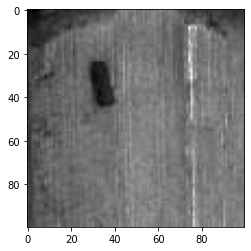

In [2]:
import matplotlib.pyplot as plt

plt.imshow(im_blowhole[2], cmap='gray')
plt.show()

**Problem:**
* collect all arrays into one (say `X`).
* create vector with appropriate classes (say `y`), classes should be integer numbers starting from zero.
* create a list that connects numers to meaning, i.e. `['no defect',...]`

You may find useful the [`concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function and synthaxix like `[1] * 2 + [2] * 3` that yields `[1,1,2,2,2]`.

In [87]:
X = np.concatenate([im_blowhole, im_break, im_crack, im_fray, im_free[:150], im_uneven])
y = np.array([1] * im_blowhole.shape[0] + 
             [2] * im_break.shape[0] + 
             [3] * im_fray.shape[0] + 
             [0] * im_free.shape[0] + 
             [4] * im_uneven.shape[0]+
             [5] * im_crack.shape[0])
labels = ['no defect', 'blowhole', 'break', 'fray', 'uneven', 'crack']

**Problem:** 
randomly split your data into train and test. 
You may consider 80% train 20% test as reasonable split.
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `shuffle=True` can be useful.

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

**Problem:**
perform feature engineering and transform your trainset accordingly, i.e. generate an array of features insted of images.
I suggest to use the HOG descriptor.
You will find [skimage.feature.hog](https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog) useful.
Check [this article](https://hav4ik.github.io/teaching/pr/02-svm-with-hog/) for visuals and theoretical understanding of HOG.

In [89]:
from skimage import feature

X_train_HOG = np.array([feature.hog(im) for im in X_train])

**Problem:**
train SVM.
You may choose linear SVM for performance, check [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class.
It seems, you may get a good quality if you choose `rbf` kernel and parameter `C` between `2` and `8`.
You may want to use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for parameter `C` estimation.


In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(kernel='rbf'), {'C': [2.0, 4.0, 8.0]})
grid.fit(X_train_HOG, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.517401764234162
{'C': 4.0}


**Problem:**
train the best model you were able to find on the trainset.

In [91]:
model = grid.best_estimator_
model.fit(X_train_HOG, y_train)

SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Problem:**
transform your testset as you did with the trainset.
Generate predictions with the model from the previous step.

In [92]:
from skimage import feature

X_test_HOG = np.array([feature.hog(im) for im in X_test])
y_predicted = model.predict(X_test_HOG)

**Problem:**
generate confusion matrix `conf_matrix` and set of appropriate labels `labels` (the latter you should have been already performed on the first step, just name it `labels`).
You may find [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) useful.

In [93]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_predicted, y_test)

**Visualization:**
if you did everything correct, just run this code and get the confusion matrix

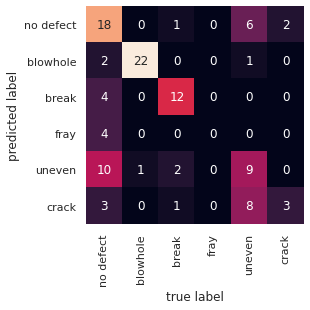

In [94]:
import seaborn as sns
sns.set()

sns.heatmap(conf_matrix.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');